# Statistiques en grande dimension 

## Projet 2 : Estimateur par projection

Mohammed Hajji

In [1]:
from numpy import *
from math import *
import random as rd
import matplotlib.pyplot as plt
import pandas as pd

$\textbf{Exercice 1}.Fourier$

$\textbf{1.}$ Simuler $n=100$ couples de variables aléatoires indépendantes $(X_i,Y_i),\small{i= 1,....,n}.$

 $\qquad$ $\textbf{1.a)}\ $ Simuler n variables $X_i$ i.i.d et uniformément ditribués sur $[0,1].$ 

In [20]:
n=100
X=random.uniform(0,1,n)

 $\qquad$ $\textbf{1.b)}\ $ Les $Y_i$ sont tels que: $$Y_i=f(X_i)+\sigma\xi_i,$$ 
où les $\xi_i$ sont des variables aléatoires normales i.i.d et $f$ une fonction de $[0,1]\longrightarrow\mathbb{R}$ définie par: $$f(x)=(x^22^{x-1}-(x-0.5)^3)sin(10x)$$
et $\sigma=0.2$.

In [21]:
sigma=0.2 # définir sigma

In [22]:
def f(x): # définir f
    return (x**2*2**(x-1)-(x-0.5)**3)*sin(10*x)

Définir $\xi_i$ pour $\small{i= 1,....,n}.$

In [23]:
Xi=random.normal(0,1,n)


et nous avons $Y=(Y_i)_{1\leq i \leq n}.$

In [24]:
#Y=[f(X[i])+sigma*Xi[i] for i in range(100)]
Y=[f(x) for x in X] + sigma*Xi #définir Y

$\textbf{2)}\ $ Représentation sur le même graphique le nuage de points $(X_i,Y_i)$ ainssi que la vraie fonction $f.$

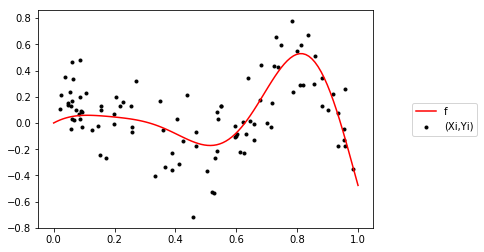

In [83]:
ax = plt.subplot(111)
z=linspace(0,1,n)
plt.scatter(X,Y,marker='.',color='black',label='(Xi,Yi)')
fz=[f(i) for i in z]
plt.plot(z,fz,color='red',label='f')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

$\textbf{3)}\ $ Estimation de la fonction de régression $f$ par un estimateur défini par projection sur la base de Fourier.

$\qquad$ $\textbf{3.a)}\ $ Traçons les $5$ premières fonctions de la base de Fourier sur le même graphique:

In [26]:
def btrigo(k,x):
    if (k==1):
        return(1)
    else:
        return cos(pi*k*x)*(k%2==0)+sin(pi*(k-1)*x)*(k%2==1)

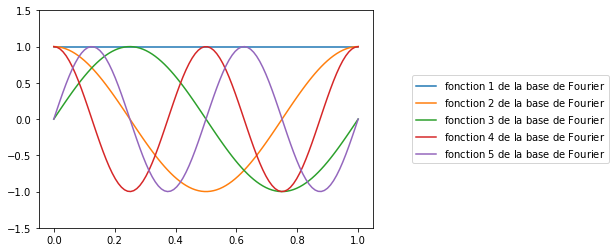

In [27]:
basetrigo=[]
ax = plt.subplot(111)
for i in range(1,6): 
    basetrigo.append([btrigo(i,j) for j in z])
    plt.plot(z,basetrigo[i-1],label='fonction $%i$ de la base de Fourier' % (i))
plt.ylim(-1.5,1.5)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

$\qquad$ $\textbf{3.b)}\ $ Construction de l'estimateur par projection $\hat{f}$  de $f$ pour $N \in\left\{5,10,15,20,30,50,70\right\}$

On commence par définir $\hat{\theta}_j$ pour $j \in \small{i= 1,....,n}.$d'après le cours:

$$\hat{\theta}_j= \frac{1}{n}\sum_{i = 1}^n Y_i \cdot \varphi_j(X_i).$$

In [28]:
def tetachap(j,X,Y):
    tetachap1=0
    for i in range(len(X)):
        tetachap1 += Y[i]*btrigo(j,X[i])
    return(tetachap1/n)

Ensuite nous avons: $$\hat{f}(x)= \sum_{j = 1}^N \hat{\theta}_j \cdot \varphi_j(x).$$

In [29]:
def fchap(x,N,X,Y):
    fchap1=0
    for j in range(1,N+1):
        fchap1 += tetachap(j,X,Y)*btrigo(j,x)
    return(fchap1)

In [30]:
fproj5=[fchap(x,5,X,Y) for x in z]
fproj10=[fchap(x,10,X,Y) for x in z]
fproj15=[fchap(x,15,X,Y) for x in z]
fproj20=[fchap(x,20,X,Y) for x in z]
fproj30=[fchap(x,30,X,Y) for x in z]
fproj50=[fchap(x,50,X,Y) for x in z]
fproj70=[fchap(x,70,X,Y) for x in z]

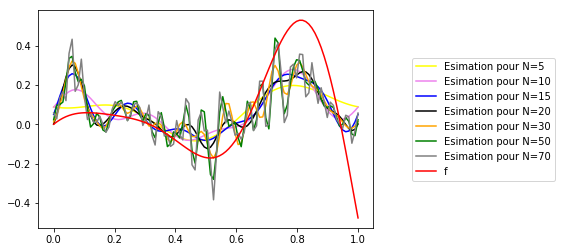

In [31]:
ax = plt.subplot(111)
plt.plot(z,fproj5,label='Esimation pour N=5',color='yellow')
plt.plot(z,fproj10,label='Esimation pour N=10',color='violet')
plt.plot(z,fproj15,label='Esimation pour N=15',color='blue')
plt.plot(z,fproj20,label='Esimation pour N=20',color='black')
plt.plot(z,fproj30,label='Esimation pour N=30',color='orange')
plt.plot(z,fproj50,label='Esimation pour N=50',color='green')
plt.plot(z,fproj70,label='Esimation pour N=70',color='grey')
plt.plot(z,fz,label='f',color='red')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

$\qquad$ $\textbf{3.c)}$ Choisissons le $N$ optimal par la méthode de la validation croisée

On construit d'abord nos blocs: 

In [32]:
def distribbloc(nb,n): #Distribue aleatoirement les (X,Y) dans 
    #nb blocs en donnant les positions de X et Y pour chaques blocs
    Bloc=[]
    taillebloc=floor(n/nb)
    B=arange(nb*taillebloc)
    rd.shuffle(B)
    for i in range(nb):
        Bloc.append(B[taillebloc*i:taillebloc*(i+1)])
    return Bloc

On construit nôtre $\hat{g}^{-v}$

In [33]:
def gchap(v,x,N,X,Y):
    res=0
    for j in range(1,N+1): #
        for i in range(n):
            res=res+(Y[i]*btrigo(j,X[i])*btrigo(j,x)*(not(i in v)))
    return res/(n-len(v))

On construit ensuite une fonction qui nous permet de calculer l'erreur $\mathcal{E}$ sur chaque bloc $B_v$ et on considère ici la fonction de perte $l$ de la forme : $$ l : \mathbb{R} \times\mathbb{R}\longrightarrow\mathbb{R}^+ $$ 
$$ (x,y)\longrightarrow (x-y)^2$$
l'erreur sur chaque bloc est alors : $$ \mathcal{E}(\hat{g}^{-v})=\frac{1}{\left|B_v\right|}\sum_{i \in B_v}l(\hat{g}^{-v}(X_i),Y_i).$$


In [34]:
def errbv(v,N,X,Y):
    res=0
    for i in v:
        res += (gchap(v,X[i],N,X,Y)-Y[i])**2
    return res/len(v)

la fonction $errval$ nous permet de calculer l'erreur de la validation croisée: c'est la somme des erreurs de chaqu'un de nos $5$ blocs. C'est à dire : $$cv(g_j) = \sum_{i = 1}^v \mathcal{E}(\hat{g}_j^{-v}).$$

In [35]:
def errval(N,X,Y,n):
    Bloc=distribbloc(5,n) #On répartit ensuite nos données dans 5 blocs
    res=0
    for i in range(len(Bloc)): #len(Bloc)=nombre de blocs
        res += errbv(Bloc[i],N,X,Y)
    return res/(len(Bloc[0]))

Calculons l'erreur de la validation croisée pour chaque $N \in\left\{5,10,15,20,30,50,70\right\}$ et choisissons celui qui minimise $errval$

In [37]:
Nset=array([5, 10, 15, 20, 30, 50, 70]) # les valeurs possibles N 
tailleNset=len(Nset)# #nombre des valeurs possibles
CVstock=zeros(tailleNset) # initialisation du vecteur de stockage
for i in range(tailleNset):
    CVstock[i]=errval(Nset[i],X,Y,n)
    print("Cv(N)=",CVstock[i]," pour N=",Nset[i])#affichage de cv(Ni)
    #pour chaque Ni dans l'interval
Nopt=Nset[argmin(CVstock)]# valeur de Nopt
print("N optimal=",Nopt) # affichage de la valeur de Nopt

Cv(N)= 0.013752392898722533  pour N= 5
Cv(N)= 0.013374251907153833  pour N= 10
Cv(N)= 0.013740695090713148  pour N= 15
Cv(N)= 0.014174417405652024  pour N= 20
Cv(N)= 0.015210129030868626  pour N= 30
Cv(N)= 0.016422754626977447  pour N= 50
Cv(N)= 0.018503537688576596  pour N= 70
N optimal= 10


Traçons sur le même graphique notre meilleur estimation de N et la vraie fonction $f:$

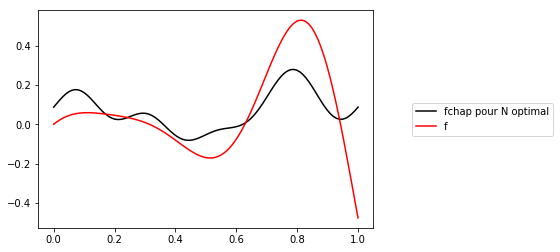

In [38]:
ax = plt.subplot(111)
fchapeaunopt=[fchap(x,Nopt,X,Y) for x in z]
plt.plot(z,fchapeaunopt,label='fchap pour N optimal',color='black')
plt.plot(z,fz,label='f',color='red')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

$\textbf{4)}\ $ La valeur du paramètre $N$ optimal obtenue ci-dessus, dépend de l'échantillon $(X_1,Y_1),....,(X_n,Y_n).$ pour constater la tendance de N optimal on réitère la procédure ci-dessus $200$ fois et on trace l'histogramme:

Construisons d'abord une fonction qui cherche N optimal pour chaque itération :

In [39]:
def chercheNopt(X,Y) :
    Nset=array([5, 10, 15, 20, 30, 50, 70]) # les valeurs de N possibles 
    tailleNset=len(Nset)# #nombre de points que N pourrait prendre
    CVstock=zeros(tailleNset) # initialisation du vecteur de stockage
    for i in range(tailleNset):
        CVstock[i]=errval(Nset[i],X,Y,len(X))
       # print("Cv(N)=",CVstock[i]," pour N=",Nset[i])#affichage de cv(Ni) pour chaque Ni
    #dans les valeur possibles de N 
    Nopt=Nset[argmin(CVstock)]# valeur de Nopt
    return Nopt
    #print("N optimal=",Nopt) # affichage de la valeur de Nopt

In [40]:
chercheNopt(X,Y)

10

Réitérons k fois l'opération ci-dessus

In [41]:
def histog(k):
    Nhist=[]
    i=0
    Nopt=0
    while (i<k):
        X=random.uniform(0,1,n)
        Y=[f(x) for x in X] + sigma*Xi
        Nopt=chercheNopt(X,Y)
        print(Nopt)
        Nhist.append(Nopt)
        i+=1
    return Nhist

Dans notre cas on réitère 200 fois l'opération :

In [42]:
kl=histog(200)
kl

15
15
20
15
5
15
15
15
20
5
20
15
5
10
15
10
10
15
10
10
5
30
5
20
10
20
15
10
10
10
10
10
50
30
15
10
15
10
20
20
15
20
10
10
15
10
20
10
15
15
20
20
15
10
10
5
5
15
30
10
30
5
20
15
10
20
15
10
15
70
10
15
5
20
20
10
5
15
10
30
10
5
30
10
20
15
10
10
30
10
10
30
15
10
15
15
30
15
20
10
5
10
30
70
15
20
10
20
20
10
10
15
20
10
5
20
50
15
10
10
5
15
10
10
20
10
20
20
15
30
10
10
10
15
10
10
15
15
20
20
10
10
30
15
5
15
50
10
50
20
15
10
20
10
30
5
10
5
15
10
10
10
10
15
10
10
20
15
15
15
20
50
10
20
10
10
5
10
70
20
10
10
20
10
10
5
15
10
20
15
20
10
5
10
15
15
15
10
30
10


[15,
 15,
 20,
 15,
 5,
 15,
 15,
 15,
 20,
 5,
 20,
 15,
 5,
 10,
 15,
 10,
 10,
 15,
 10,
 10,
 5,
 30,
 5,
 20,
 10,
 20,
 15,
 10,
 10,
 10,
 10,
 10,
 50,
 30,
 15,
 10,
 15,
 10,
 20,
 20,
 15,
 20,
 10,
 10,
 15,
 10,
 20,
 10,
 15,
 15,
 20,
 20,
 15,
 10,
 10,
 5,
 5,
 15,
 30,
 10,
 30,
 5,
 20,
 15,
 10,
 20,
 15,
 10,
 15,
 70,
 10,
 15,
 5,
 20,
 20,
 10,
 5,
 15,
 10,
 30,
 10,
 5,
 30,
 10,
 20,
 15,
 10,
 10,
 30,
 10,
 10,
 30,
 15,
 10,
 15,
 15,
 30,
 15,
 20,
 10,
 5,
 10,
 30,
 70,
 15,
 20,
 10,
 20,
 20,
 10,
 10,
 15,
 20,
 10,
 5,
 20,
 50,
 15,
 10,
 10,
 5,
 15,
 10,
 10,
 20,
 10,
 20,
 20,
 15,
 30,
 10,
 10,
 10,
 15,
 10,
 10,
 15,
 15,
 20,
 20,
 10,
 10,
 30,
 15,
 5,
 15,
 50,
 10,
 50,
 20,
 15,
 10,
 20,
 10,
 30,
 5,
 10,
 5,
 15,
 10,
 10,
 10,
 10,
 15,
 10,
 10,
 20,
 15,
 15,
 15,
 20,
 50,
 10,
 20,
 10,
 10,
 5,
 10,
 70,
 20,
 10,
 10,
 20,
 10,
 10,
 5,
 15,
 10,
 20,
 15,
 20,
 10,
 5,
 10,
 15,
 15,
 15,
 10,
 30,
 10]

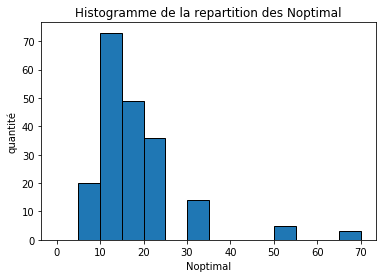

In [69]:
plt.hist(kl,range(0,71,5),edgecolor = 'black')
plt.xlabel('Noptimal')
plt.ylabel('quantité')
plt.title('Histogramme de la repartition des Noptimal')
plt.show()

$\textbf{5)} \ $ On conclue que le $N$ optimal pour notre estimation par projection fluctue sur l'intervalle autour de 10-15 mais cela dépend des données, on peut malgré tout avoir un $N$ optimal assez global en procédant de manière empirique.
Ainsi on peut dire qu'avec la méthode d'estimation par projection, la paramètre optimal de lissage fluctuera pour un même modèle, variant avec les données.

$\textbf{Exercice 2}.Données\ réelles$

Le dataset suivant, représente la température moyenne en degré Celsius observée au fil des années à la
surface de la terre et des océans dans le globe de 1880 juqu'à 2016 par rapport à la "norme" qui vaut 0 (par exemple si la température observée sur cette date est de 18 et que la norme est à 17, on aura un différentiel de +1). Ces données sont fournies par deux organismes, GCAG et GISTEMP. Nous choisissons d'estimer la fonction de regression des donnés fournies par la GCAG. Autrement dire, estimer $f$ tel que:
$$ anomalietemperature = f(\frac{annee-1880}{2016-1880}) + \sigma\xi$$
$ \textbf{GCAG:}$ Global component of Climate at a Glance.$  \qquad 
\textbf{GISTEMP:}Global Land-Ocean Temperature Index$ 

In [72]:
temp = pd.read_csv('annual_csv.csv')

In [73]:
temp.head()

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,0.9900
2,GCAG,2015,0.8998
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408


In [74]:
X1=[]
Y1=[]
X1GCAG=[temp.Year[i] for i in range(0,len(temp.Year),2)] #on ne garde que les résultats de CGCAG
X1=(X1GCAG-min(X1GCAG))/(max(X1GCAG)-min(X1GCAG)) #on pose X1 entre 0 et 1
Y1=[temp.Mean[i] for i in range(0,len(temp.Year),2)]

 Représentation du nuage de points $(X1_i,Y1_i)$.

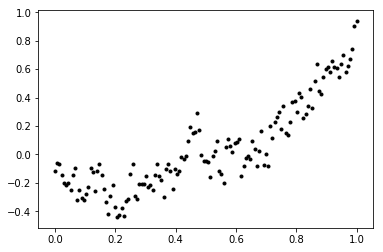

In [75]:
plt.scatter(X1,Y1,marker='.',color='black')

In [76]:
minX1=min(X1)
maxX1=max(X1)
z1=linspace(minX1,maxX1,len(X1))
z2=linspace(1880,2017,len(X1))

In [77]:
fprojN5=[fchap(x,5,X1,Y1) for x in z1]
fprojN10=[fchap(x,10,X1,Y1) for x in z1]
fprojN15=[fchap(x,15,X1,Y1) for x in z1]
fprojN20=[fchap(x,20,X1,Y1) for x in z1]
fprojN30=[fchap(x,30,X1,Y1) for x in z1]
fprojN50=[fchap(x,50,X1,Y1) for x in z1]
fprojN70=[fchap(x,70,X1,Y1) for x in z1]

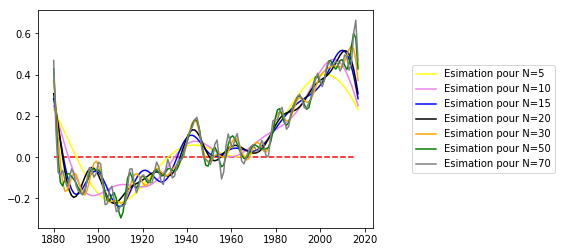

In [78]:
ax = plt.subplot(111)
plt.plot(z2,fprojN5,label='Esimation pour N=5',color='yellow')
plt.plot(z2,fprojN10,label='Esimation pour N=10',color='violet')
plt.plot(z2,fprojN15,label='Esimation pour N=15',color='blue')
plt.plot(z2,fprojN20,label='Esimation pour N=20',color='black')
plt.plot(z2,fprojN30,label='Esimation pour N=30',color='orange')
plt.plot(z2,fprojN50,label='Esimation pour N=50',color='green')
plt.plot(z2,fprojN70,label='Esimation pour N=70',color='grey')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.hlines(0,min(X1GCAG),max(X1GCAG),color='red',linestyles='dashed')
plt.show()

Recherchons le N optimal pour les couples $(X1_i,Y1_i)_{1 \leq i \leq137 }$

In [81]:
Nset=array([5, 10, 15, 20, 30, 50, 70]) # intervalle de N 
tailleNset=len(Nset)# #nombre de points que N prend
CVstock=zeros(tailleNset) # initialisation du vecteur de stockage
for i in range(tailleNset):
    CVstock[i]=errval(Nset[i],X1,Y1,len(X1))
    print("Cv(N)=",CVstock[i]," pour N=",Nset[i])#affichage de cv(Ni) pour chaque Ni dans l'interval
Nopt=Nset[argmin(CVstock)]# valeur de Nopt
print("N optimal=",Nopt) # affichage de la valeur de Nopt

Cv(N)= 0.011242531138435763  pour N= 5
Cv(N)= 0.009927732558041502  pour N= 10
Cv(N)= 0.009138130885279587  pour N= 15
Cv(N)= 0.010067519452211706  pour N= 20
Cv(N)= 0.009258763689153815  pour N= 30
Cv(N)= 0.010908366596184882  pour N= 50
Cv(N)= 0.011315588894996296  pour N= 70
N optimal= 15


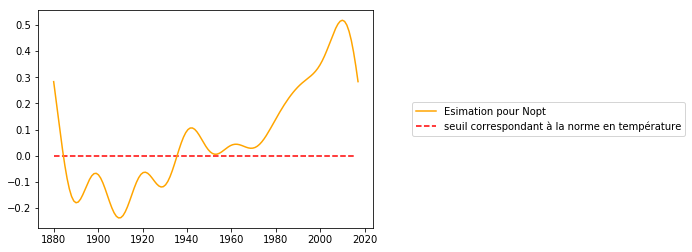

In [82]:
ax = plt.subplot(111)
fprojNopt=[fchap(x,Nopt,X1,Y1) for x in z1]
plt.plot(z2,fprojNopt,label='Esimation pour Nopt',color='orange')
plt.hlines(0,min(X1GCAG),max(X1GCAG),label="seuil correspondant à la norme en température",color='red',linestyles='dashed')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

Nous voyons ainsi clairement la tendance depuis environ 1970 à avoir des écarts de températures de plus en plus au dessus des normes et de manière globale, depuis 1880 la température augmente.